# Importing Required Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
data=pd.read_csv('titanic.csv')
titanic=data.copy()
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [17]:
titanic.rename(columns={'sex':'gender', 'survived':'alived'}, inplace=True)

In [18]:
titanic.describe()

,alived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Verifying Data Integrity: Identifying and Eliminating Missing Values

In [19]:
titanic.isna().sum()

alived        0
pclass        0
gender        0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [20]:
titanic.dropna(axis='columns',thresh=500, inplace=True)

# Preserving the 'Age' Column: Imputing Missing Values with the Mean

In [24]:
mean=round(titanic.age.mean(),0)

In [22]:
titanic['age']=titanic.age.fillna(mean)

In [29]:
titanic.dropna(inplace=True)

In [30]:
titanic.isna().sum()

alived      0
pclass      0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

# Determining the Fortunes of Males: Below vs. Above Age 10

In [31]:
male_under_10=titanic.loc[(titanic.gender=='male')& (titanic.age<10)]
male_above_10=titanic.loc[(titanic.gender=='male') & (titanic.age>10)]

In [35]:
male_above_10.describe()
### We can see that the mean for people who are alived is only 16.5%

,alived,pclass,age,sibsp,parch,fare
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,0.165441,2.376838,32.184743,0.323529,0.165441,25.078698
std,0.371920,0.822954,11.542234,0.907366,0.544705,43.962418
min,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,25.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,30.000000,0.000000,0.000000,10.335400
75%,0.000000,3.000000,36.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [37]:
male_under_10.describe()
# Here we can easily see that being a male under 10 y. was better for the surviving rate. It is 59.3% 

,alived,pclass,age,sibsp,parch,fare
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.593750,2.593750,3.770938,2.156250,1.375000,33.017969
std,0.498991,0.614837,2.955642,1.743363,0.491869,25.728373
min,0.000000,1.000000,0.420000,0.000000,1.000000,8.516700
25%,0.000000,2.000000,1.000000,1.000000,1.000000,20.081250
50%,1.000000,3.000000,3.000000,1.000000,1.000000,29.125000
75%,1.000000,3.000000,6.250000,4.000000,2.000000,37.503150
max,1.000000,3.000000,9.000000,5.000000,2.000000,151.550000


# Lets to the same for the females

In [42]:
female_above_10=titanic.loc[(titanic.gender=='female') & (titanic.age>10)]
female_under_10=titanic.loc[(titanic.gender=='female') & (titanic.age<10)]

In [43]:
female_above_10.describe()

,alived,pclass,age,sibsp,parch,fare
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,0.754448,2.110320,30.724199,0.612100,0.565836,46.061686
std,0.431182,0.865159,10.592345,1.096616,1.026492,60.451438
min,0.000000,1.000000,11.000000,0.000000,0.000000,6.750000
25%,1.000000,1.000000,24.000000,0.000000,0.000000,10.500000
50%,1.000000,2.000000,30.000000,0.000000,0.000000,23.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,57.979200
max,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [44]:
female_under_10.describe()

,alived,pclass,age,sibsp,parch,fare
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.633333,2.666667,4.416667,1.533333,1.433333,27.972637
std,0.490133,0.546672,2.709604,1.407696,0.568321,24.780829
min,0.000000,1.000000,0.750000,0.000000,0.000000,10.462500
25%,0.000000,2.000000,2.000000,0.000000,1.000000,17.339575
50%,1.000000,3.000000,4.000000,1.000000,1.000000,24.500000
75%,1.000000,3.000000,6.000000,2.750000,2.000000,31.275000
max,1.000000,3.000000,9.000000,4.000000,2.000000,151.550000


## Exploring Survival Disparities: People Under  And Above 10 - Male vs. Female

## This analysis employs data visualizations to highlight potential differences in survival rates between male and female

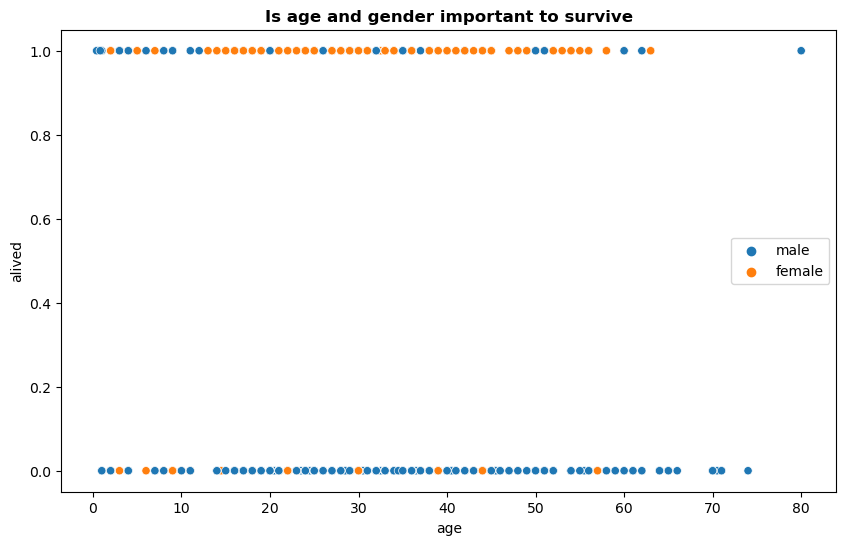

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=titanic, x='age',y='alived' , hue='gender')
plt.title('Is age and gender important to survive', fontweight='bold' )
plt.legend(loc='center right')

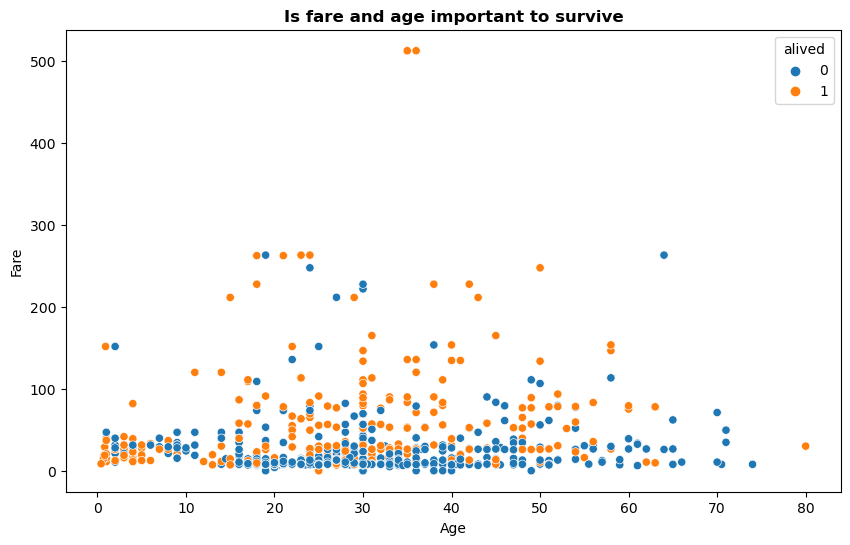

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='alived')
plt.title('Is fare and age important to survive', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [48]:
titanic

,alived,pclass,gender,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [49]:
titanic.to_csv('new_titanic.csv', index=False)